<a href="https://colab.research.google.com/github/AhmedBuckets/SPS602/blob/main/FinalProjectProposal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Proposal Information:
In the appropriate BlackBoard assignment post, please submit the below information
regarding your project. Your proposal can be an informal document using bullet points
and you may include any python code or output. At the minimum, you must include:
1. Research Question
2. Justification - why is this relevant to you or industry?
3. Data Sources - did you find this data online or collect yourself? Provide links.
4. Libraries potentially being used.
5. EDA and summary statistics.
You may upload this information as a .pdf or .doc file.

### **Research Question**
Can we use data imputation techniques to improve ML models used to detect credit card fraud?


### **Justification**
I am interested in practical uses for machine learning models and so I would like to explore how they can be used to detect fraudulent behavior online. I will be using credit card fraud specifically, and I will also explore some of the challenges encountered there. One challenge in particular is skew of data- while fraud might be on the rise now as online scams become more popular, compared to the larger set of transactions it is a very small number. This makes it harder to make a good ML model because it will be biased towards legitimate transactions. 

### **Data Source**
The data source is from kaggle, found here: https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud

I have uploaded it to my github account and will show some summary stats below: 

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import numpy

In [2]:
#I've uploaded the file to my github page and will use read_csv from the pandas library to access it
df = pd.read_csv('https://raw.githubusercontent.com/AhmedBuckets/SPS602/main/card_transdata.csv')

In [3]:
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [4]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


### **Libraries to be Used**
I will of course be using pandas, but in addition to that I will probably need: numpy, TensorFlow or some other ML library, and matplotlib to show off some visuals. 

### **EDA and Summary Stats**


In [5]:
# First I check for nulls- this data seems to be all there thankfully and so no cleanup on that isle
df.isnull().values.any()

False

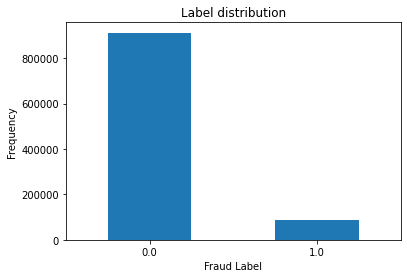

In [13]:
count_classes = pd.value_counts(df['fraud'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Label distribution")
plt.xlabel("Fraud Label")
plt.ylabel("Frequency");

As expected, the label column in this set, which shows whether or not a row represents a fraudulent transaction. This will be where we apply some techniques to balance out this data. As-is, the model will be heavily biased towards labeling transaction as legitimate due to the sheer overpowering number of legitimate ones. 

We don't want this behavior as, if anything, we want to err on the side of fraud since a lot is at stake. 

Also for some reason this column is in "float" format, and it would be more efficient to make it an integer since we will be treating it as a categorical variable. 

In [17]:
summary_stats = df.groupby("fraud")["distance_from_last_transaction"].mean()
summary_stats

fraud
0.0     4.301391
1.0    12.712185
Name: distance_from_last_transaction, dtype: float64

Another feature I was interested in was "distance_from_last_transaction"- intuitively I would think that a case would be more likely to be fraudulent the transaction happened farther away than usual from the last transaction. On first look this bears out, as the average distance for fraudulent transactions is much higher than for legitimate ones. 